In [1]:
# Politican pipeline 
import plotly.plotly as py
import pandas as pd
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
import pickle
from bqplot import *

In [17]:
# set the user 
# Charlie Baker Example
user = 'MassGovernor'
#user = 'realDonaldTrump'
#user = 'SenWarren'
#user = 'BarackObama'

data_file = '{}_sentiment_data.csv'.format(user)
hash_data = '{}_hashtags.pkl'.format(user)
macro_sent_data = '{}_sent_stats.pkl'.format(user)
data_path = '../Twitter_to_vec/user_tweets/'
# orientation of twitter image
orientation = 'right'

In [3]:
df = pd.read_csv(data_path + user + "/" + data_file)

In [4]:
df.head()

,Unnamed: 0,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,...,retweeted_status,source,text,truncated,user,preds,w_preds,pos_proba,w_pos_proba,hashtags
0,0,NaN,NaN,Fri Apr 27 18:53:52 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,989940712069324800,...,{'created_at': 'Fri Apr 27 13:15:04 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...","RT @MassHHS: Last night, @MLSudders, @MassGove...",False,"{'id': 18023868, 'id_str': '18023868', 'name':...",1,0,0.756154,0.000000,[]
1,1,NaN,NaN,Fri Apr 27 18:53:29 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,989940615898128384,...,{'created_at': 'Fri Apr 27 17:43:13 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @youthvillagesMA: 350 guests raised $1.1 fo...,False,"{'id': 18023868, 'id_str': '18023868', 'name':...",1,0,0.947418,0.000000,[]
2,2,NaN,NaN,Fri Apr 27 18:36:57 +0000 2018,"{'hashtags': [{'text': 'EconDev', 'indices': [...",NaN,18,False,NaN,989936454137712642,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",The #EconDev bill we filed last month would co...,True,"{'id': 18023868, 'id_str': '18023868', 'name':...",1,18,0.567481,10.214652,['EconDev']
3,3,NaN,NaN,Fri Apr 27 18:35:27 +0000 2018,"{'hashtags': [{'text': 'SkillsCapital', 'indic...",NaN,40,False,NaN,989936074947547136,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",We are proud to have awarded nearly $40 millio...,True,"{'id': 18023868, 'id_str': '18023868', 'name':...",1,40,0.886625,35.464995,['SkillsCapital']
4,4,NaN,NaN,Fri Apr 27 18:35:22 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,78,False,NaN,989936054022148096,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Thrilled to be here at @BVTHighSchool in Upton...,True,"{'id': 18023868, 'id_str': '18023868', 'name':...",1,78,0.812919,63.407655,[]


In [5]:
def hash_tag_sent_build(df):
    hashtags = {}
    hts = df.hashtags.values
    pos_proba = df.pos_proba.values
    classify_rat = 0
    for i in tqdm(range(len(hts))):
        tmp_tag = list(eval(hts[i]))
       
        if len(tmp_tag) > 0:
            classify_rat +=1
            for j in tmp_tag:
                if j not in hashtags:
                    hashtags[j] = {0:0, 1:1, 'Count':0}
                hashtags[j][0] += (1- pos_proba[i])
                hashtags[j][1] += pos_proba[i]
                hashtags[j]['Count']+=1
    ret_df =  pd.DataFrame.from_dict(hashtags, orient='index').sort_values("Count", ascending=False)
    ret_df['pos'] = ret_df[1] / ( ret_df[0] +  ret_df[1])
    ret_df['neg'] = ret_df[0]/( ret_df[0] +  ret_df[1])
    return ret_df.loc[ret_df["Count"] > 1]

In [6]:
ht_df = hash_tag_sent_build(df)

In [7]:
ht_df.head()

,0,1,Count,pos,neg
MBTA,39.698907,68.301093,107,0.632418,0.367582
MAsnow,33.391883,48.608117,81,0.592782,0.407218
MassWorks,14.323129,30.676871,44,0.681708,0.318292
BakerPolitoYear2,13.481693,26.518307,39,0.662958,0.337042
SkillsCapital,10.889171,27.110829,37,0.713443,0.286557


In [8]:
ht_df.Count

MBTA                   107
MAsnow                  81
MassWorks               44
BakerPolitoYear2        39
SkillsCapital           37
Massachusetts           36
MAEarthWeek             31
ClimateChange           30
MASOTC                  27
MAtraffic               22
Periscope               21
WMass                   21
MAIsrael                21
SmallBiz                20
STEM                    19
veterans                18
SJC                     18
CleanEnergy             18
cybersecurity           18
GoldStar                17
innovation              16
PuertoRico              15
EconDev                 14
drought                 14
MA                      14
BakerPolito2017         14
masnow                  13
Innovation              13
EarlyEd                 12
DCRSummerNights         12
                      ... 
BlackHistoryMonth        2
BestStates               2
Winter                   2
USAF                     2
USCG                     2
BeatTheHeat              2
V

In [9]:
xs = OrdinalScale()
ys = LinearScale()

bar = Bars(x=ht_df.index.values[:10], y=ht_df.pos.values[:10], scales={'x': xs, 'y': ys}, padding=0.2, type='grouped')
xax = Axis(scale=xs)
yax = Axis(scale=ys, orientation='vertical', tick_format='0.0%', grid_lines='solid')
fig = Figure(marks=[bar], axes=[xax, yax], animation_duration=1000, )
fig.layout.width = '1200px'
fig

Figure(animation_duration=1000, axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=LinearSca…

In [10]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

In [11]:
ht_df.Count.shape

(244,)

In [18]:
#ht_df.Count
from scipy.misc import imread

twitter_mask = imread('./twitter_mask_{}.png'.format(orientation), flatten=True)

/Users/kbernardini/anaconda3/lib/python3.6/site-packages/wordcloud/wordcloud.py:370: UserWarning:

mask image should be unsigned byte between 0 and 255. Got a float array



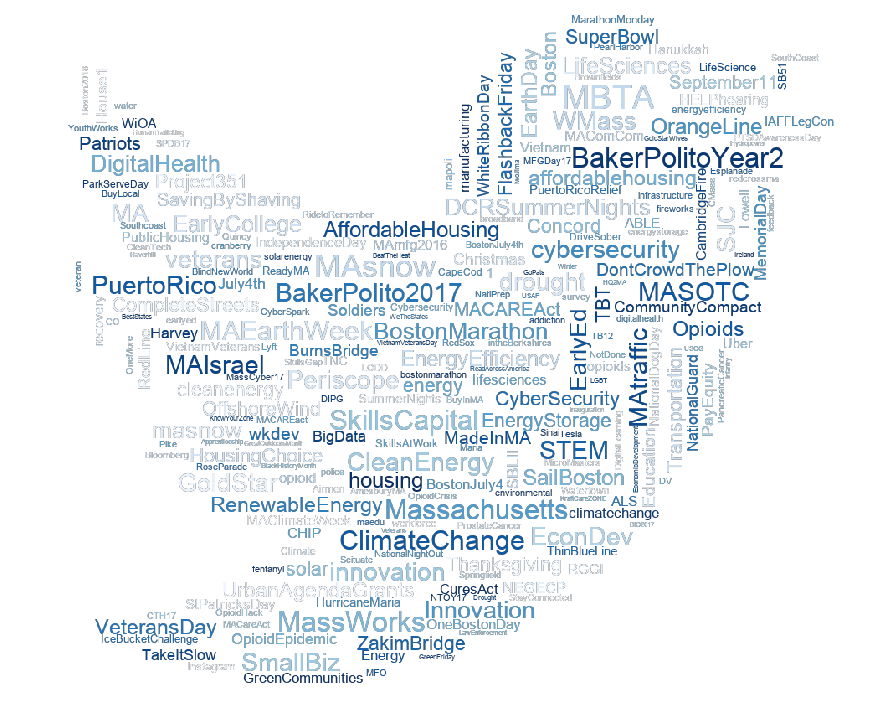

In [19]:
wordcloud = WordCloud(
                          background_color= None, #'#1dcaff',
    
                        font_path='/Library/Fonts/Arial.ttf',
                        relative_scaling =.25,
                        mode='RGBA',
                          max_words=2000,
                        width=1800,
                      height=1400,
                        colormap='Blues_r',
                        mask=twitter_mask,
                          max_font_size=40, 
                          random_state=42,
    
                         ).generate_from_frequencies(dict(ht_df.Count))
print(wordcloud)
fig = plt.figure(figsize=(15,15))
plt.imshow(wordcloud, )
plt.axis('off')
plt.show()
fig.savefig( data_path + user + "/"+ "{}_{}_word_cloud.png".format(user, orientation), dpi=900)

In [20]:
print("DONE")

DONE
